In [1]:

VERSION = '4.7'

import numpy
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

# modifying font  # fontname='Liberation Serif'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.size'] = 12

------------------------------------------------------------
#### optimization plots

In [2]:
#TODO: rifare solo con numpy senza passare da notebook

#
sim_name = '5_integral_2500_T1'
label_str = ' lag integration' if 'integral' in sim_name else ' fixed lag' 
# creating DF out of csv files
sg_name = './plot_data/' + sim_name + '/sg.csv'
cf_name = './plot_data/' + sim_name + '/cf.csv'
sg_df = pd.read_csv(sg_name) # put the csv file in the right folder
cf_df = pd.read_csv(cf_name)


In [4]:
rp_name = './plot_data/' + sim_name + '/random.csv'
rp_df = pd.read_csv(rp_name)

#
# sg_df['mean'] = sg_df.mean(axis=1)
# sg_df['std'] = sg_df.std(axis=1)
# sg_df['var'] = sg_df.var(axis=1)
# cf_df['mean'] = cf_df.mean(axis=1)
# cf_df['std'] = cf_df.std(axis=1)
# cf_df['var'] = cf_df.var(axis=1)
rp_sgap_mean = rp_df['sgap mean']
rp_sgap_std = rp_df['sgap std']


FileNotFoundError: [Errno 2] No such file or directory: './plot_data/5_integral_2500_T1/random.csv'

In [14]:
# sg_array = numpy.array(sg_df)
# a = sg_array[4][1:-2]
# print(a)

[0.0603546  0.00196476 0.1318032  0.00723257 0.06191462 0.11110711
 0.02966181 0.04057534 0.05218116 0.04263123 0.00693068 0.00790222
 0.02396262 0.00839195 0.02961041 0.01296783 0.06958766 0.07763686
 0.00833399 0.47594366 0.02086719 0.00846019 0.07912802 0.09809907
 0.06520565]


In [15]:
# N=0
# sum=0
# for data in a:
#     sum += data
#     N += 1
# mu = sum/N
# print('mean:', mu, '\n\n')

# summ = 0
# for data in a:
#     summ += (data-mu)**2
# var = summ/N
# std = numpy.sqrt(var)
# print('std:', std, '\n\n')
# print('var:', var, '\n\n')

mean: 0.06129817677495627 


std: 0.09171351493463017 


var: 0.008411368821664633 




In [3]:
#
sg_mean = numpy.array(sg_df['mean'])
sg_std = numpy.array(sg_df['std'])
sg_var = sg_std**2
cf_mean = numpy.array(cf_df['mean'])
cf_std = numpy.array(cf_df['std'])
cf_var = cf_std**2

In [72]:
#
rp_sg_mean = numpy.full(sg_mean.size, numpy.mean(rp_sgap_mean))
rp_sg_std = numpy.full(sg_mean.size, numpy.mean(rp_sgap_std))  # TODO: not sure this is correct
rp_sg_var = rp_sg_std**2

In [5]:
# #
rp_sg_mean = numpy.full(sg_mean.size, 0.043583361144471554) # ## 5  0.02830443489738722,0.02085859586071295  ## 4   0.043583361144471554,0.03593292584462959
rp_sg_std = numpy.full(sg_mean.size, 0.03593292584462959)  # TODO: not sure this is correct
rp_sg_var = rp_sg_std**2

In [30]:
# #
# cut_off = 81
# #
# sg_mean = sg_mean[:cut_off]
# sg_std = sg_std[:cut_off]
# sg_var = sg_var[:cut_off]
# cf_mean = cf_mean[:cut_off]
# cf_std = cf_std[:cut_off]
# cf_var = cf_var[:cut_off]
# #
# rp_sg_mean = rp_sg_mean[:cut_off]
# rp_sg_std = rp_sg_std[:cut_off]
# rp_sg_var = rp_sg_var[:cut_off]

In [6]:
# remove outlier
sg_mean = sg_mean[1:]
sg_std = sg_std[1:]
sg_var = sg_var[1:]
cf_mean = cf_mean[1:]
cf_std = cf_std[1:]
cf_var = cf_var[1:]

rp_sg_mean = rp_sg_mean[1:]
rp_sg_std = rp_sg_std[1:]
rp_sg_var = rp_sg_var[1:]

In [52]:
# normalize cf NON CAMBIA L'APPARENZA DEL GRAFICO! RIMANE IDENTICO
mc_length = 2500
l = 4
#
cf_mean = cf_mean/(mc_length - l)
cf_std = cf_std/(mc_length - l)
cf_var = cf_var/(mc_length - l)

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

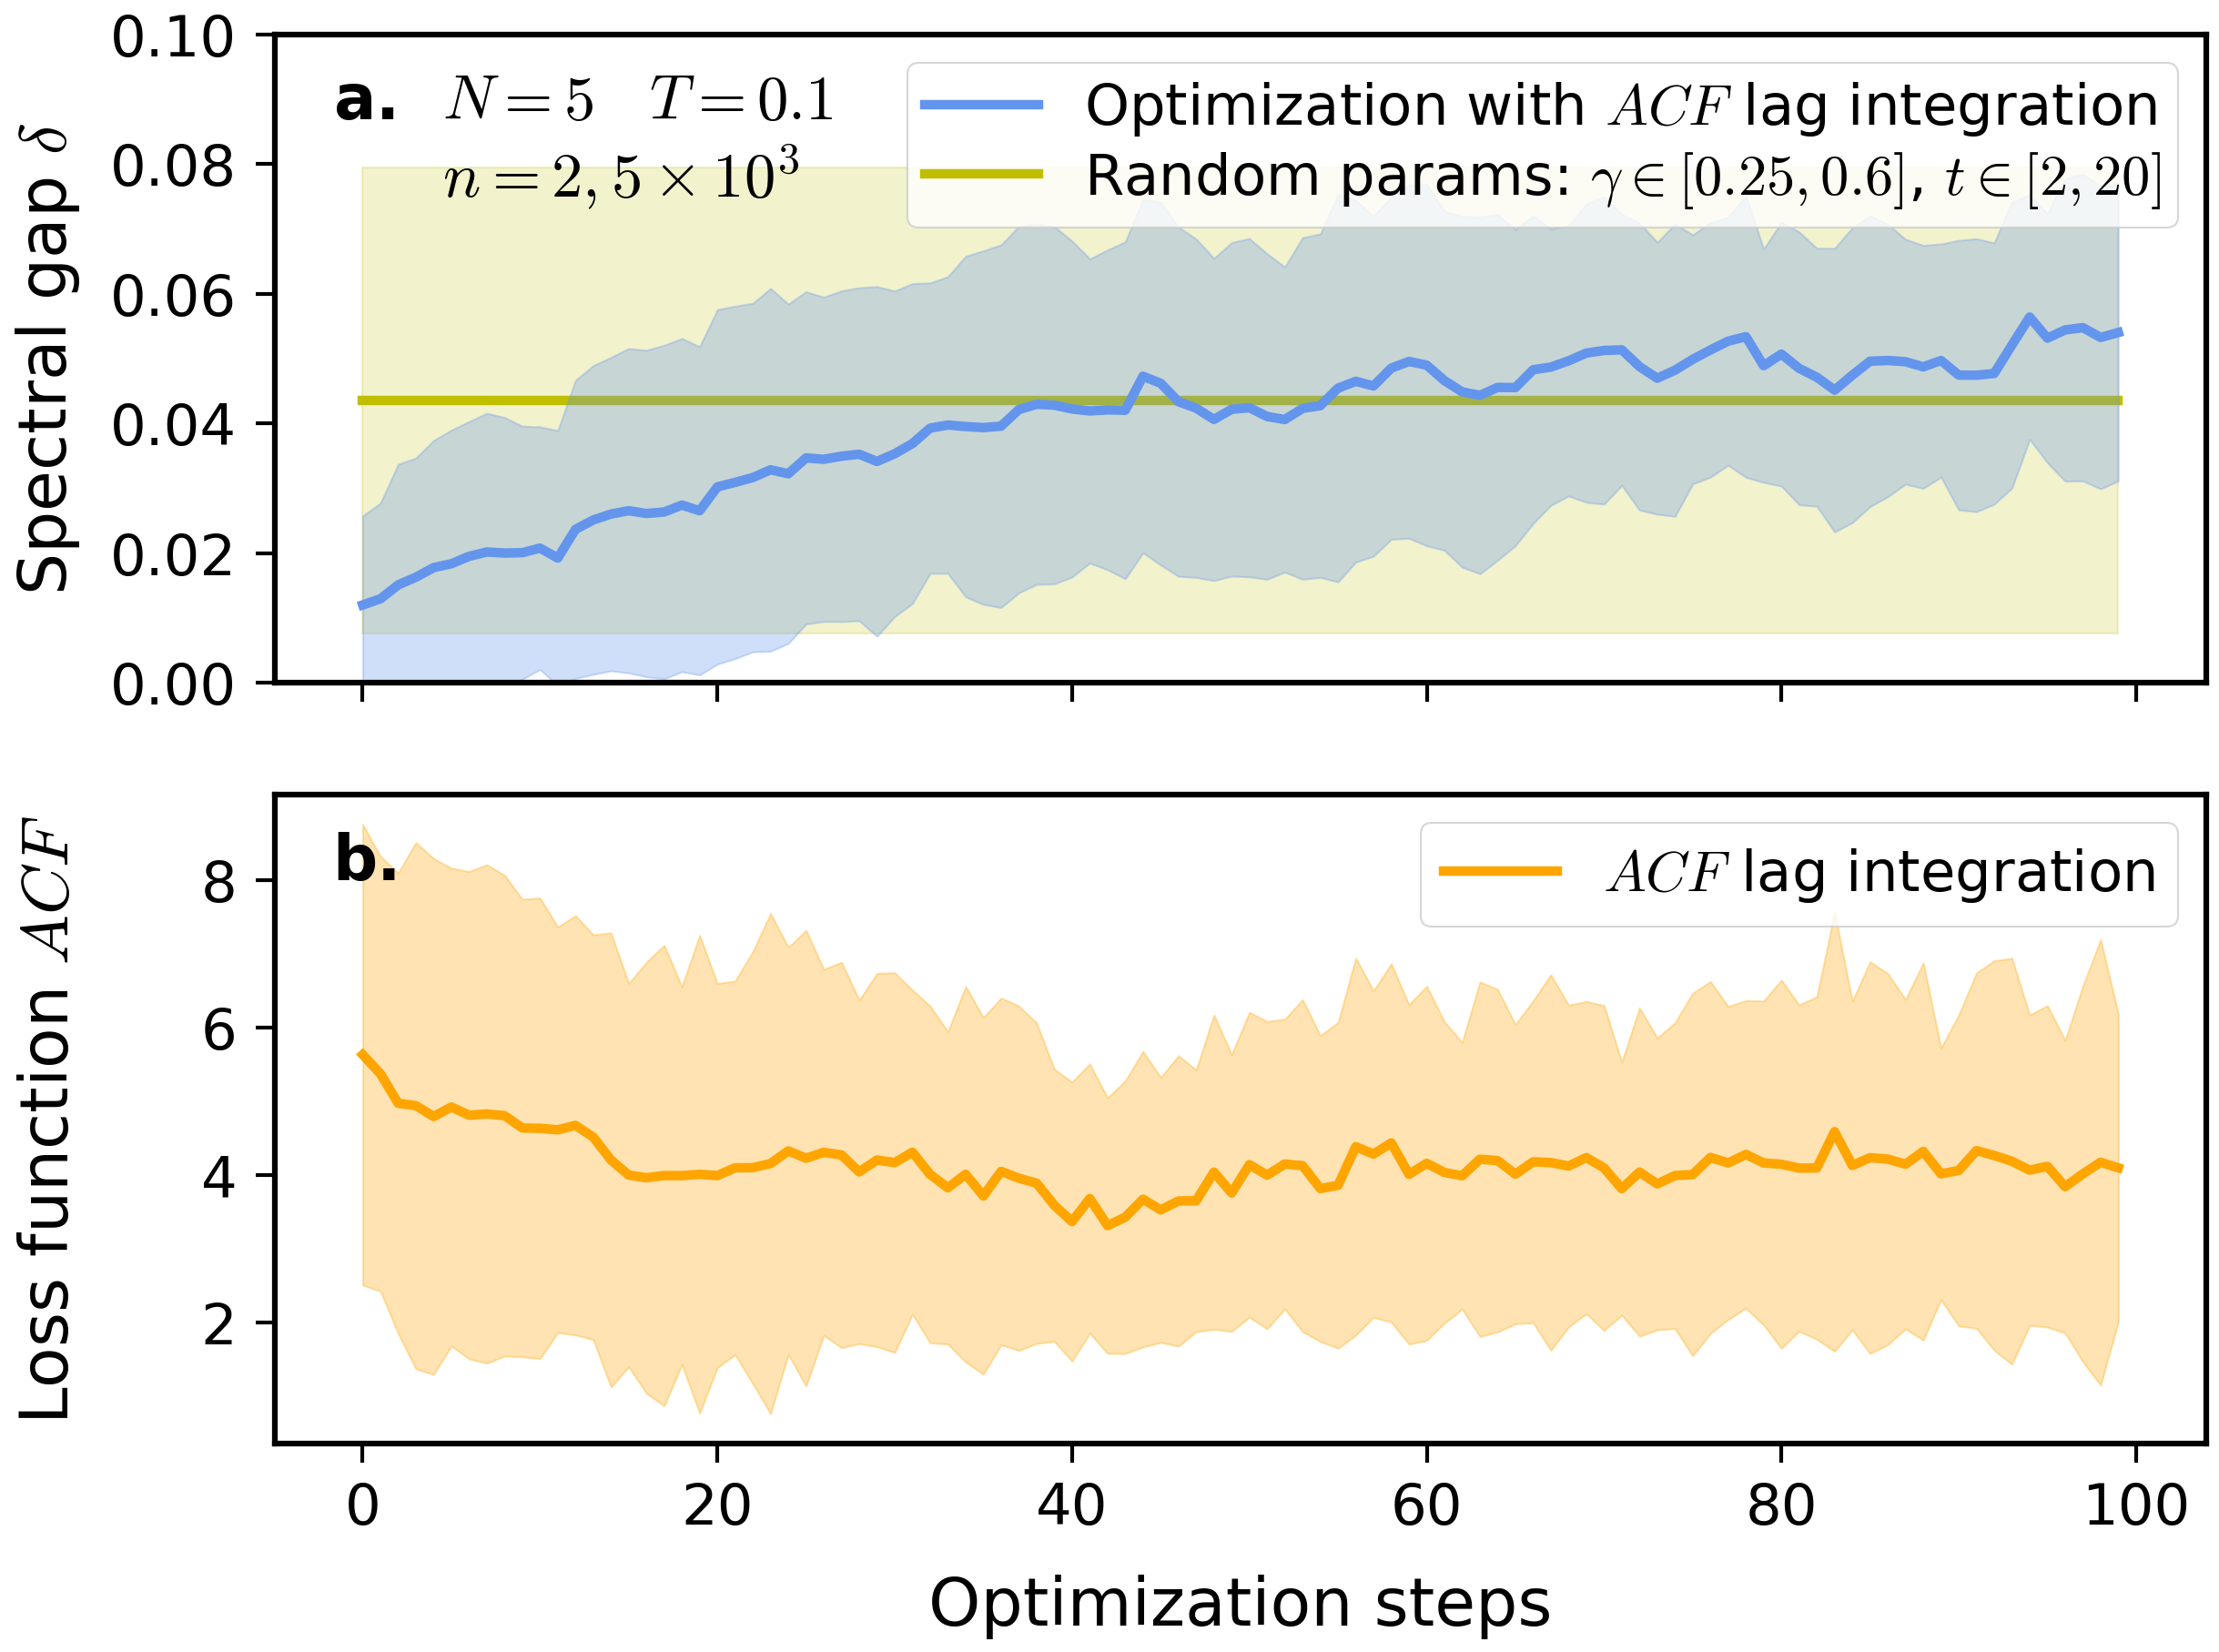

In [7]:
#
plot_name = 'opt_' + sim_name

# plotting
subplots_n = 2
figure, axis = plt.subplots((subplots_n), figsize=(15, 11), dpi=150)
figure.tight_layout(h_pad=3, w_pad=4)  # distances between subplots
#
# spectral gap
axis[0].plot(range(sg_mean.size), sg_mean, color='cornflowerblue', label='Optimization with $ACF$' + label_str,
               linestyle='-', lw=5, zorder=2)  # marker='o', markersize=10
axis[0].fill_between(range(sg_mean.size), sg_mean-sg_std, sg_mean+sg_std, alpha=0.3,
                     edgecolor='cornflowerblue', facecolor='cornflowerblue', linewidth=1, zorder=2)  # sg_mean-sg_var, sg_mean+sg_var
#random approach spectral gap
axis[0].plot(range(rp_sg_mean.size), rp_sg_mean, color='y', label='Random params: $\gamma \in [0.25, 0.6]$, $t \in [2, 20]$',
               linestyle='-', lw=5, zorder=1)  # marker='o', markersize=10
axis[0].fill_between(range(rp_sg_mean.size), rp_sg_mean-rp_sg_std, rp_sg_mean+rp_sg_std, alpha=0.2,
                     edgecolor='y', facecolor='y', linewidth=1, zorder=1)  # rp_sg_mean-rp_sg_var, rp_sg_mean+rp_sg_var

axis[0].text(0.03, + 0.75, f'a.  $N={sim_name[0]} \quad T=0.1$ \n$\qquad n=2,5 \\times 10^3$', fontsize = 33, transform=axis[0].transAxes, fontweight='bold') # 0.03, + 0.87
#axis[0].grid(linestyle='--')
axis[0].set_xticklabels([])
axis[0].set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis[0].tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis[0].legend(fontsize=30, loc='upper right', borderpad=0.3, labelspacing=0.2)  # loc='upper left', labelspacing=2, borderpad=2, prop={'size':50}
# axis[0].set_title('Spectral gap $\delta$')
axis[0].set_ylim(0, 0.10)
for ax in ['top','bottom','left','right']:
    axis[0].spines[ax].set_linewidth(3)
# cost function
axis[1].plot(range(cf_mean.size), cf_mean, color='orange',
                  label='$ACF$' + label_str, linestyle='-', lw=5)  # , markersize=10, marker='o'
axis[1].fill_between(range(cf_mean.size), cf_mean-cf_std, cf_mean+cf_std, alpha=0.3,
                     edgecolor='orange', facecolor='orange', linewidth=1)
# axis[1].grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
axis[1].set_ylabel('Loss function $ACF$', fontsize=35, labelpad=15)
axis[1].set_xlabel('Optimization steps', fontsize=35, labelpad=20)
axis[1].tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis[1].legend(fontsize=30)  # , loc='upper right'
axis[1].text(0.03, + 0.87, 'b.', fontsize = 33, transform=axis[1].transAxes, fontweight='bold')
#axis[1].set_ylim(-5, 150)
#axis[1].set_yscale('log')
for ax in ['top','bottom','left','right']:
    axis[1].spines[ax].set_linewidth(3)
#
figure.align_ylabels(axis[:])
plt.show()

In [174]:
# saving the plot as png file
png_name = './final_plots/1_' + plot_name + '.png'
figure.savefig(png_name, bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

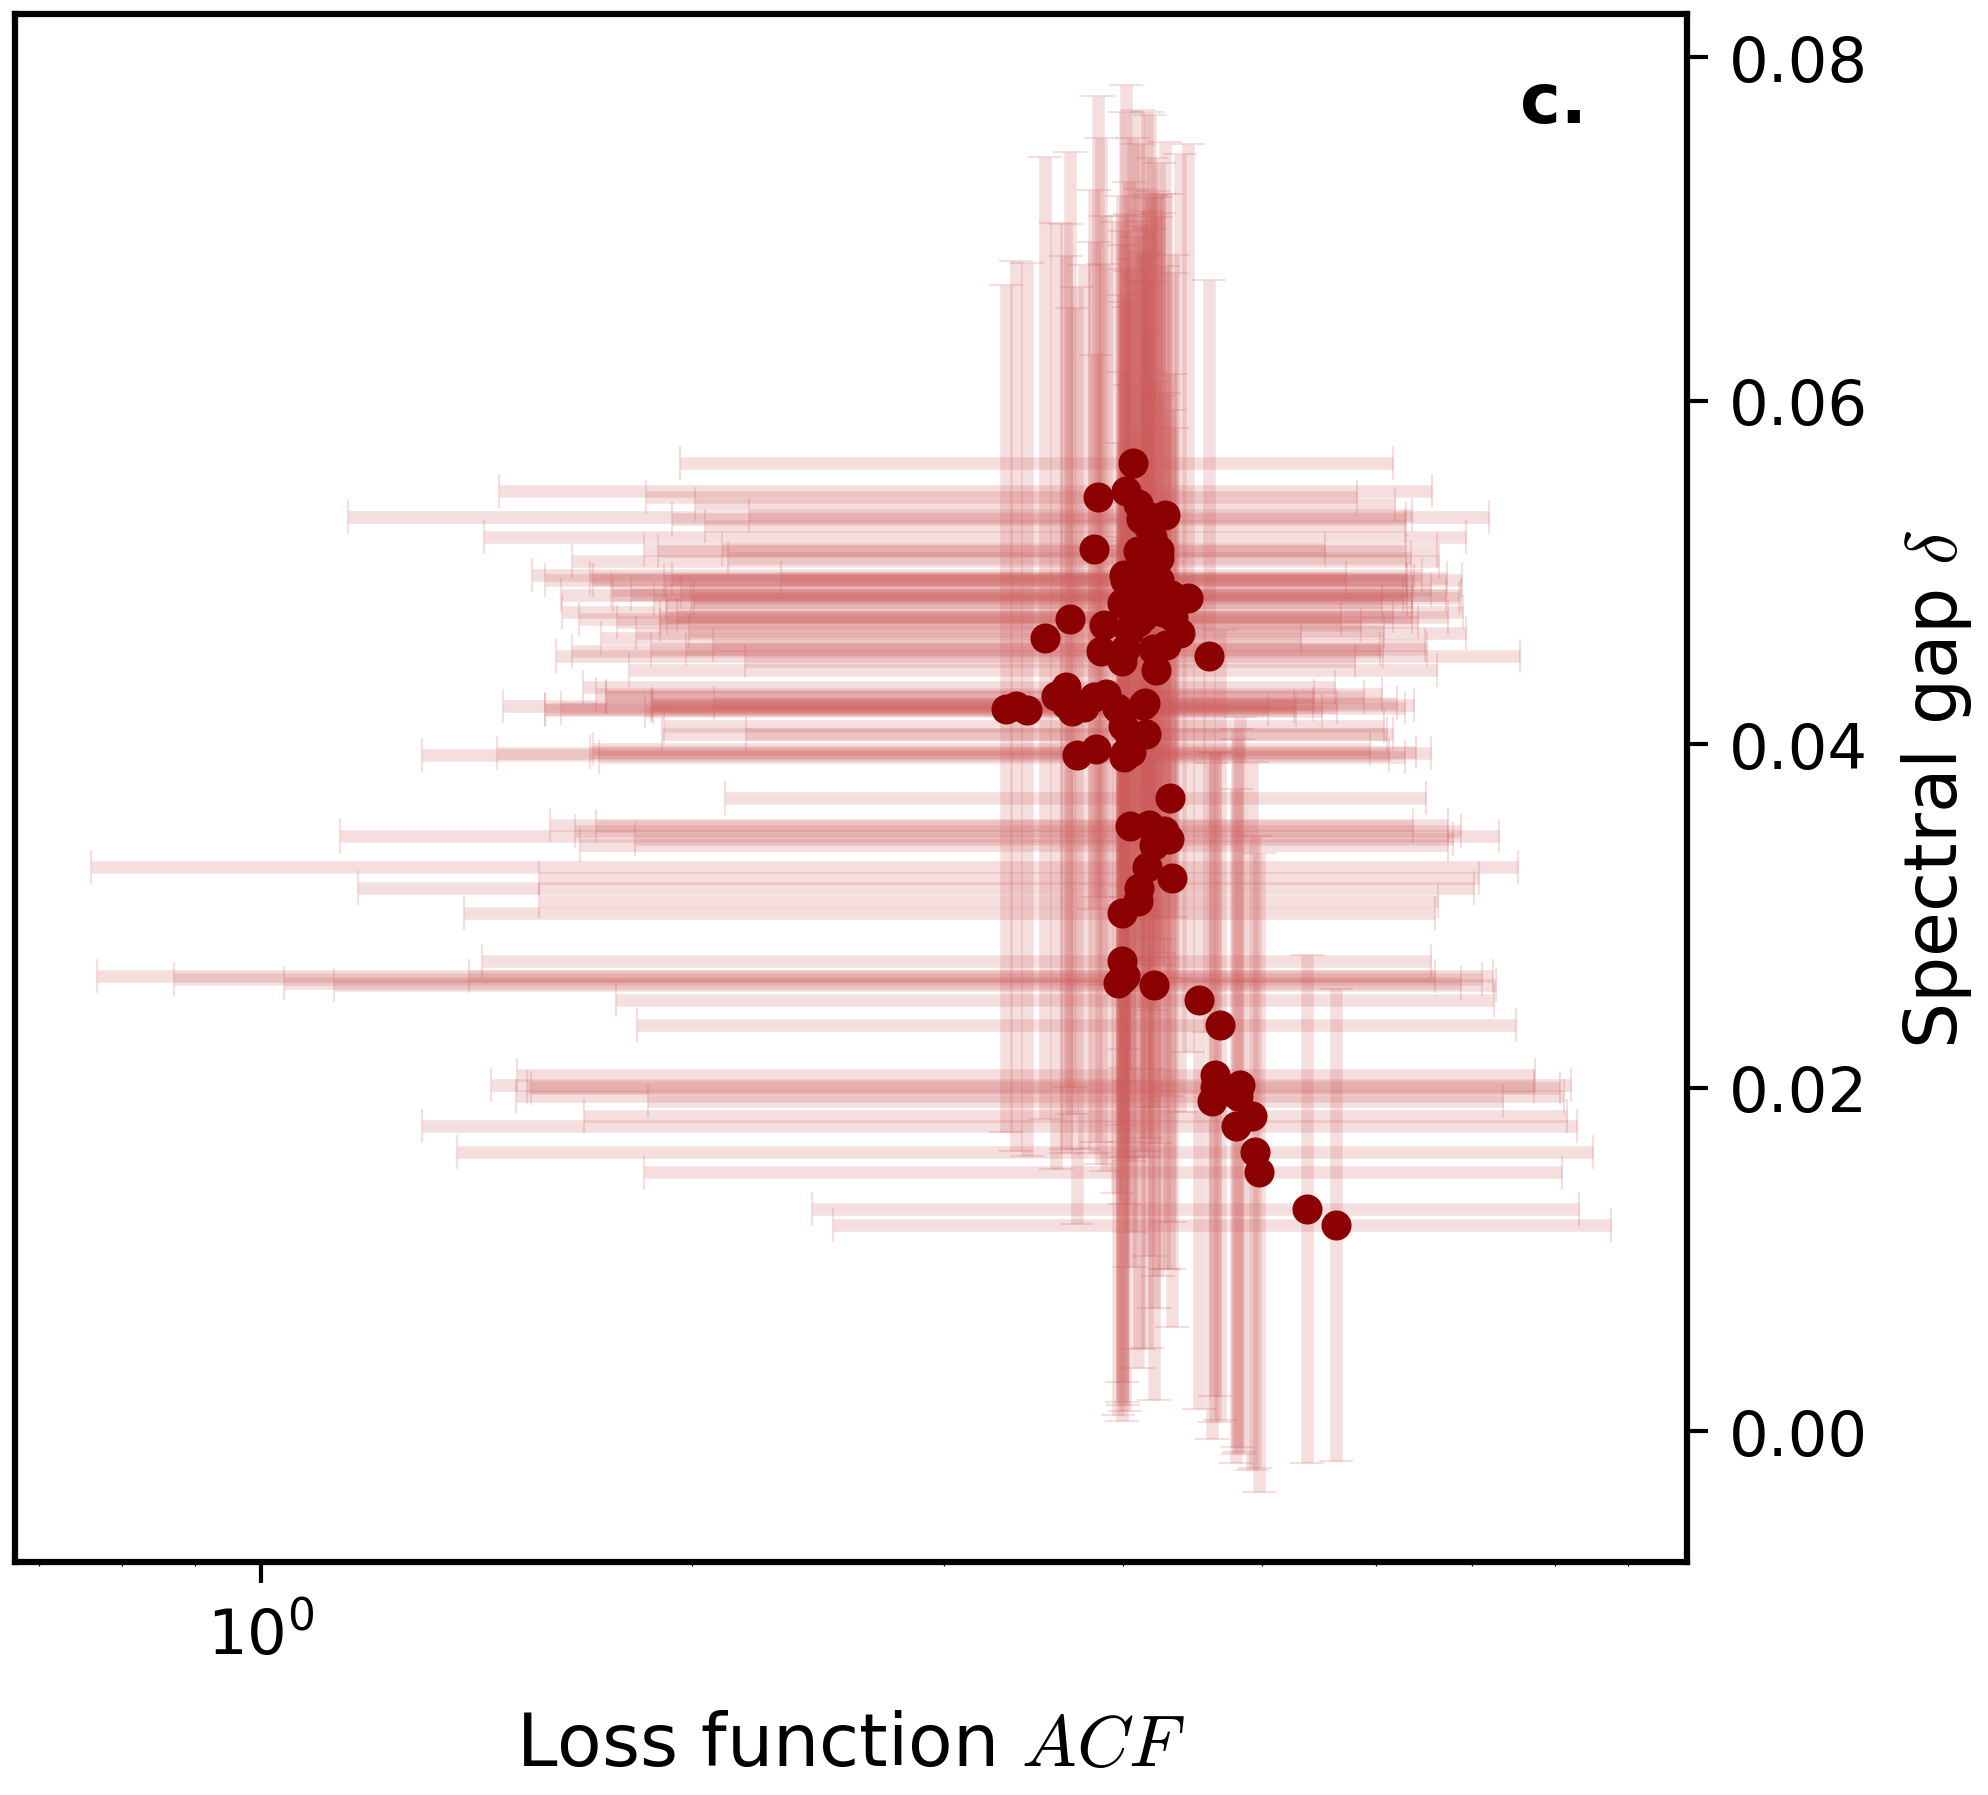

In [8]:
subplots_n = 1
figure, axis = plt.subplots((subplots_n), figsize=(12, 11), dpi=150)
figure.tight_layout(h_pad=4, w_pad=4)  # distances between subplots
# correlation
markers, caps, bars = axis.errorbar(cf_mean, sg_mean, yerr=sg_std, xerr=cf_std, color='darkred',
               ecolor='indianred', elinewidth=6, capsize=8, barsabove=True, markersize=12,
               alpha=1, fmt='o', zorder=1) # (remove first point as it's usually an outlier)
axis.scatter(cf_mean, sg_mean, s=180, marker='o', color='darkred', zorder=3)
[bar.set_alpha(0.2) for bar in bars]
[cap.set_alpha(0.2) for cap in caps]
#axis.grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
axis.yaxis.set_label_position("right")
axis.yaxis.tick_right()
axis.set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis.set_xlabel('Loss function $ACF$', fontsize=35, labelpad=20)
axis.tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis.text(0.9, + 0.93, 'c.', fontsize = 33, transform=axis.transAxes, fontweight='bold')
axis.set_xscale('log')
#axis.legend(fontsize=15)
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(3)
#
plt.show()

In [176]:
# saving the plot as png file
png_name = './final_plots/2_' + plot_name + '.png'
figure.savefig(png_name, bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

--------------------------------------------------------------------------
#### 3d plots

In [2]:
#
sim_name = '2D_nn' #'single_inst_4'
method = 'int'


In [3]:
# creating DF out of csv files
cf_name = './plot_data/' + sim_name + '/cf_' + method + '_5000' + '.csv'
cf_df = pd.read_csv(cf_name)
cost_f = numpy.array(cf_df)

FileNotFoundError: [Errno 2] No such file or directory: './plot_data/2D_nn/cf_int_5000.csv'

In [4]:
# creating DF out of csv files
cf_name = './plot_data/' + sim_name + '/cf' + '.csv'
cf_df = pd.read_csv(cf_name)
cost_f = numpy.array(cf_df)

In [5]:
sg_name = './plot_data/' + sim_name + '/sg.csv'
sg_df = pd.read_csv(sg_name) # put the csv file in the right folder
spectral_gap = numpy.array(sg_df)

In [22]:
spectral_gap[numpy.unravel_index(spectral_gap.argmax(), spectral_gap.shape)]

0.19250960292430153

In [42]:
numpy.unravel_index(spectral_gap.argmax(), spectral_gap.shape)

(3, 65)

In [6]:
#
resolution = 100
gammas = numpy.linspace(0.07, 1, resolution)
taus = numpy.linspace(1, 10, resolution)
#
# USA COLAB PER STAMPARE LA HEATMAP DEL COUPLING PER GLI SPINS
# saving plots
xticklabels=[numpy.round(gammas, decimals=2)[i] if i%(resolution//5)==0 or i+1==resolution else None for i in range(gammas.size)]
yticklabels=[numpy.round(taus, decimals=1)[i] if i%(resolution//5)==0 or i+1==resolution else None for i in range(taus.size-1)]
yticklabels[-1] = 10

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

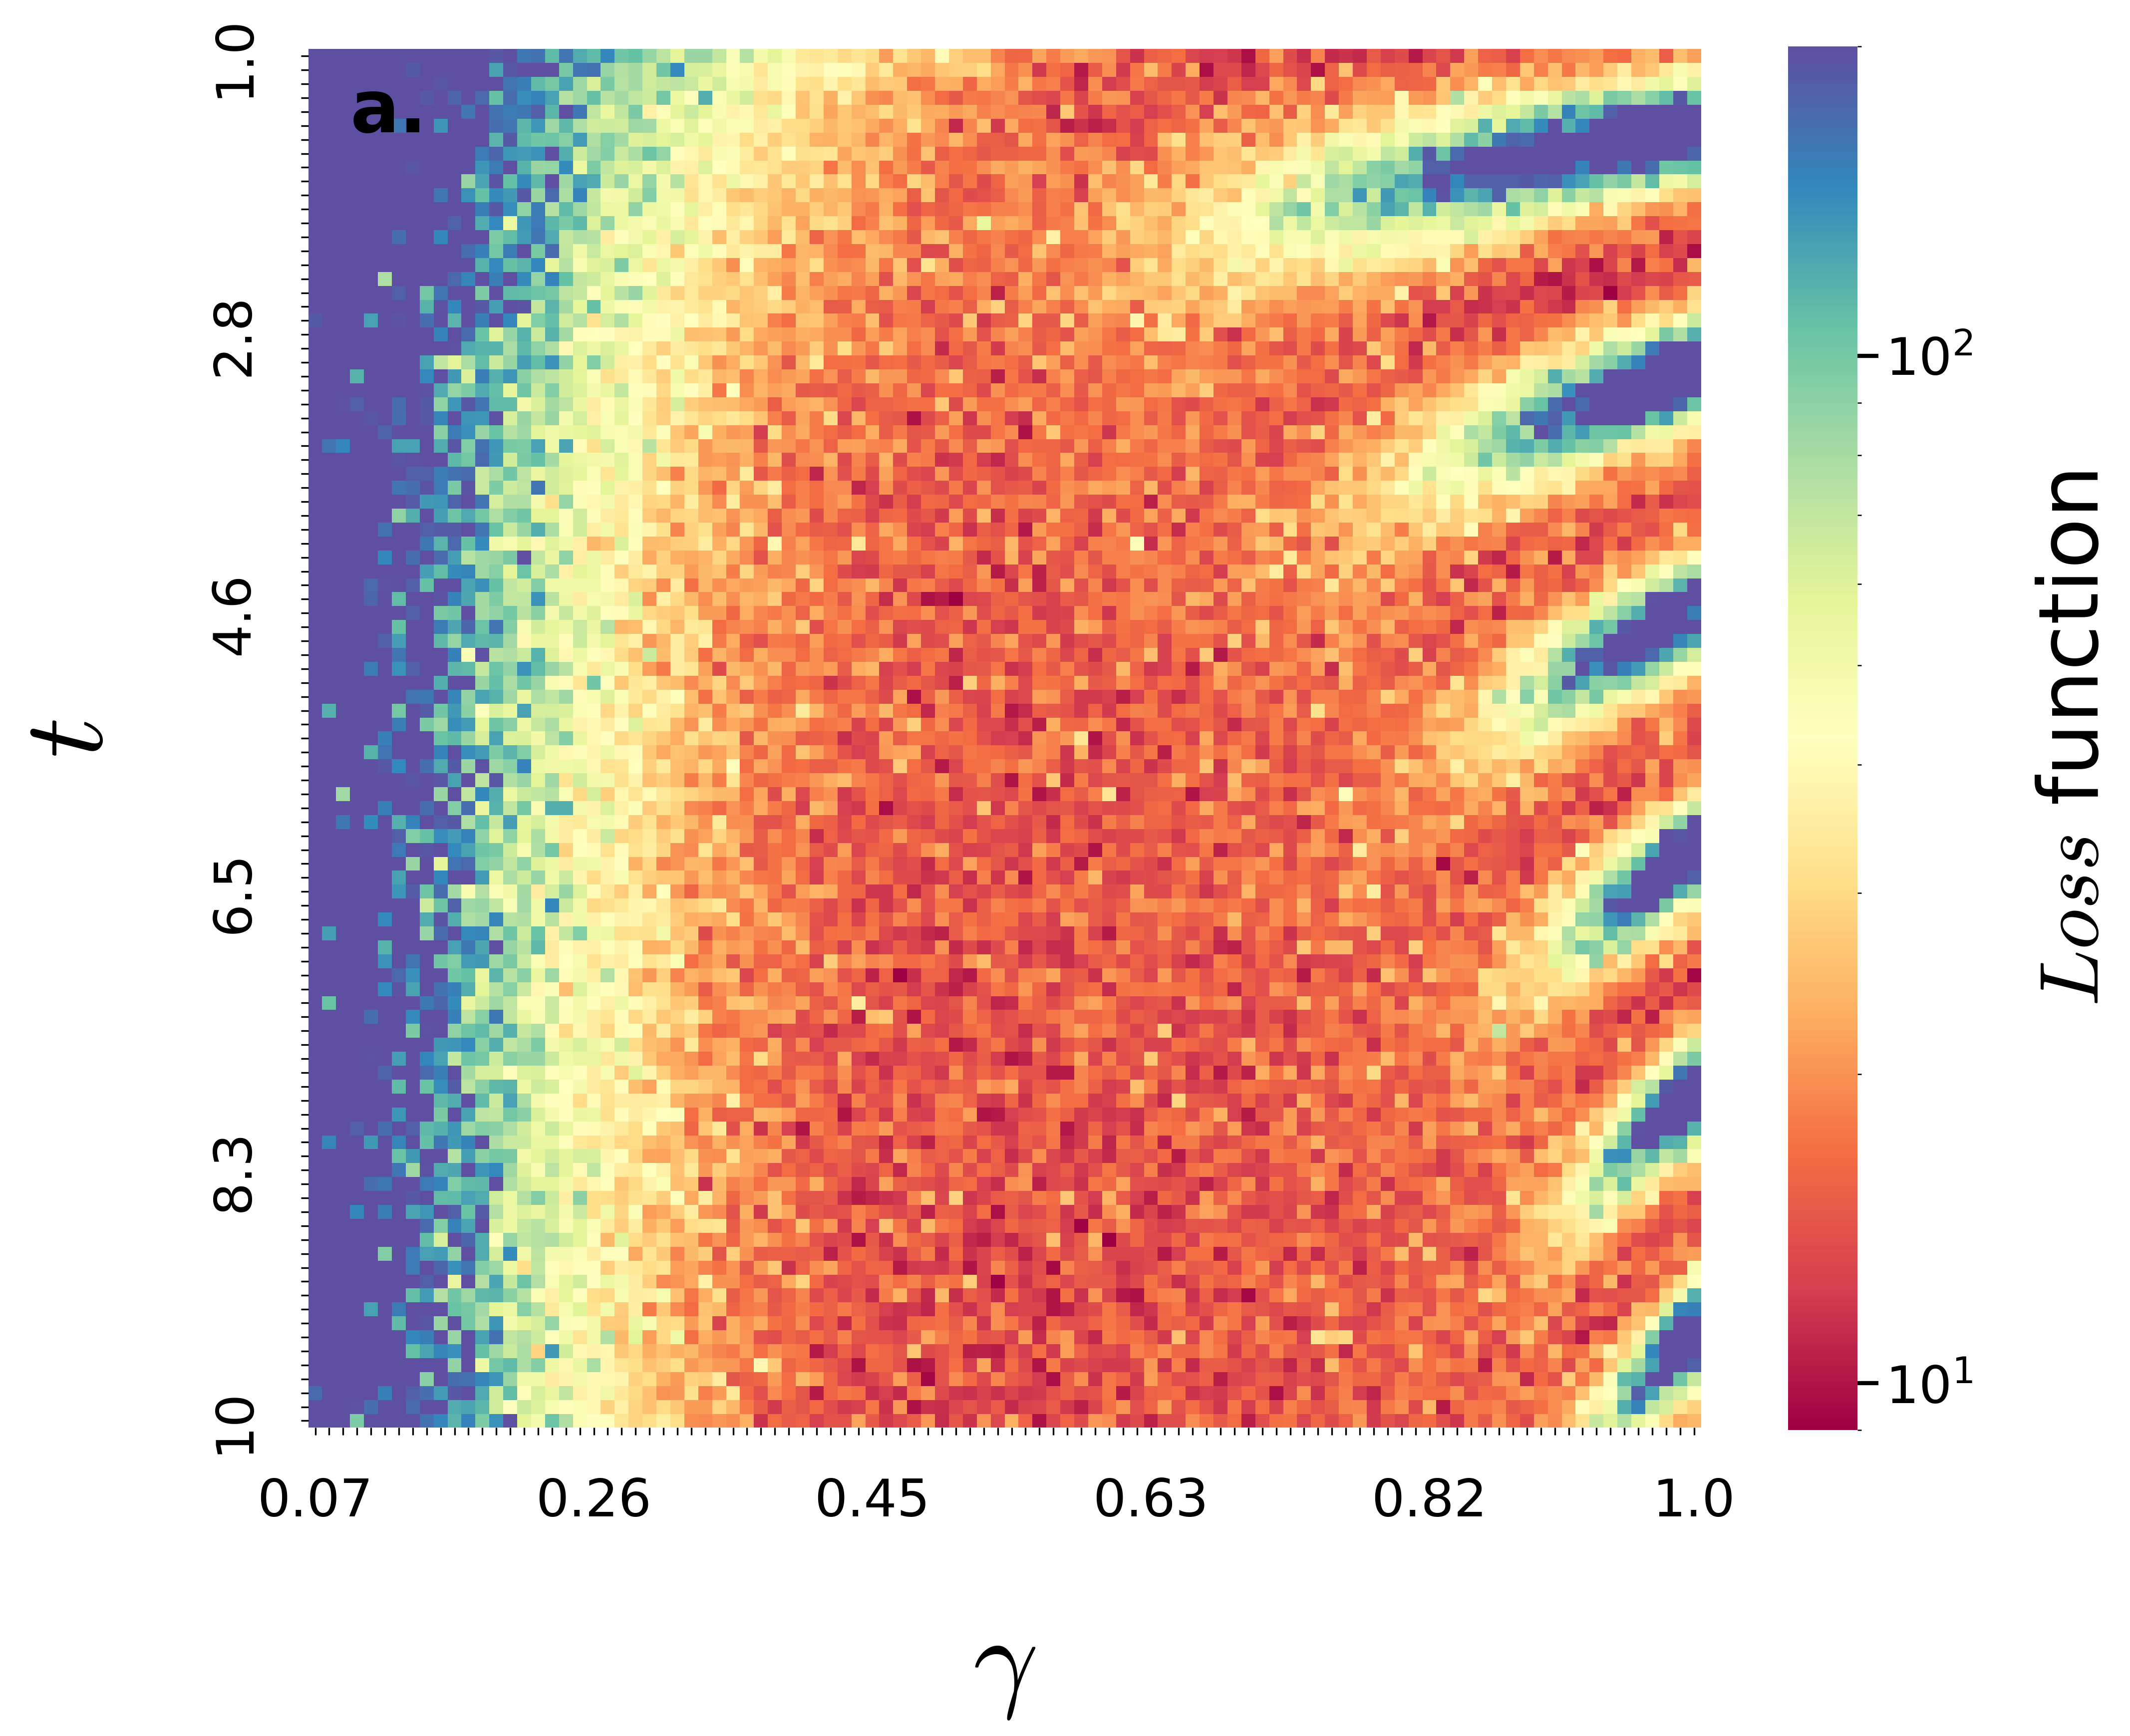

In [8]:
# plotting colormap cost function
plt.figure(figsize=(15,12), dpi=300)
# t integral
s = sns.heatmap(cost_f, square=True, annot=False, cbar=True, cmap='Spectral', xticklabels=xticklabels,
             yticklabels=yticklabels, norm=matplotlib.colors.LogNorm(vmin=9, vmax=200))   # viridis coolwarm
# s = sns.heatmap(cost_f, square=True, annot=False, cbar=True, cmap='viridis', xticklabels=xticklabels,
#                yticklabels=yticklabels, norm=matplotlib.colors.LogNorm())
# fixed t
# s = sns.heatmap(cost_f, square=True, annot=False, cbar=True, cmap='viridis', xticklabels=xticklabels,
#                  yticklabels=yticklabels, vmin=10, vmax=200)  # vmin=0, vmax=200
s.set_xlabel('$\gamma$', fontsize=55, labelpad=40)
s.set_ylabel('$t$', fontsize=55, labelpad=40)
s.tick_params(labelsize=25, axis='both', which='major', pad=20)
s.figure.axes[1].tick_params(labelsize=25, width=2, length=10)
s.collections[0].colorbar.set_label('$Loss$ function', fontsize=40, labelpad=30)  # fontname='Liberation Serif'
s.text(0.03, + 0.94, 'a.', fontsize = 35, transform=s.transAxes, fontweight='bold')  # , color='white'
# plt.yticks(rotation=0)
# plt.xticks(rotation=0)  
plt.savefig('./final_plots/cf_' + method + '_' + sim_name + '.png', bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

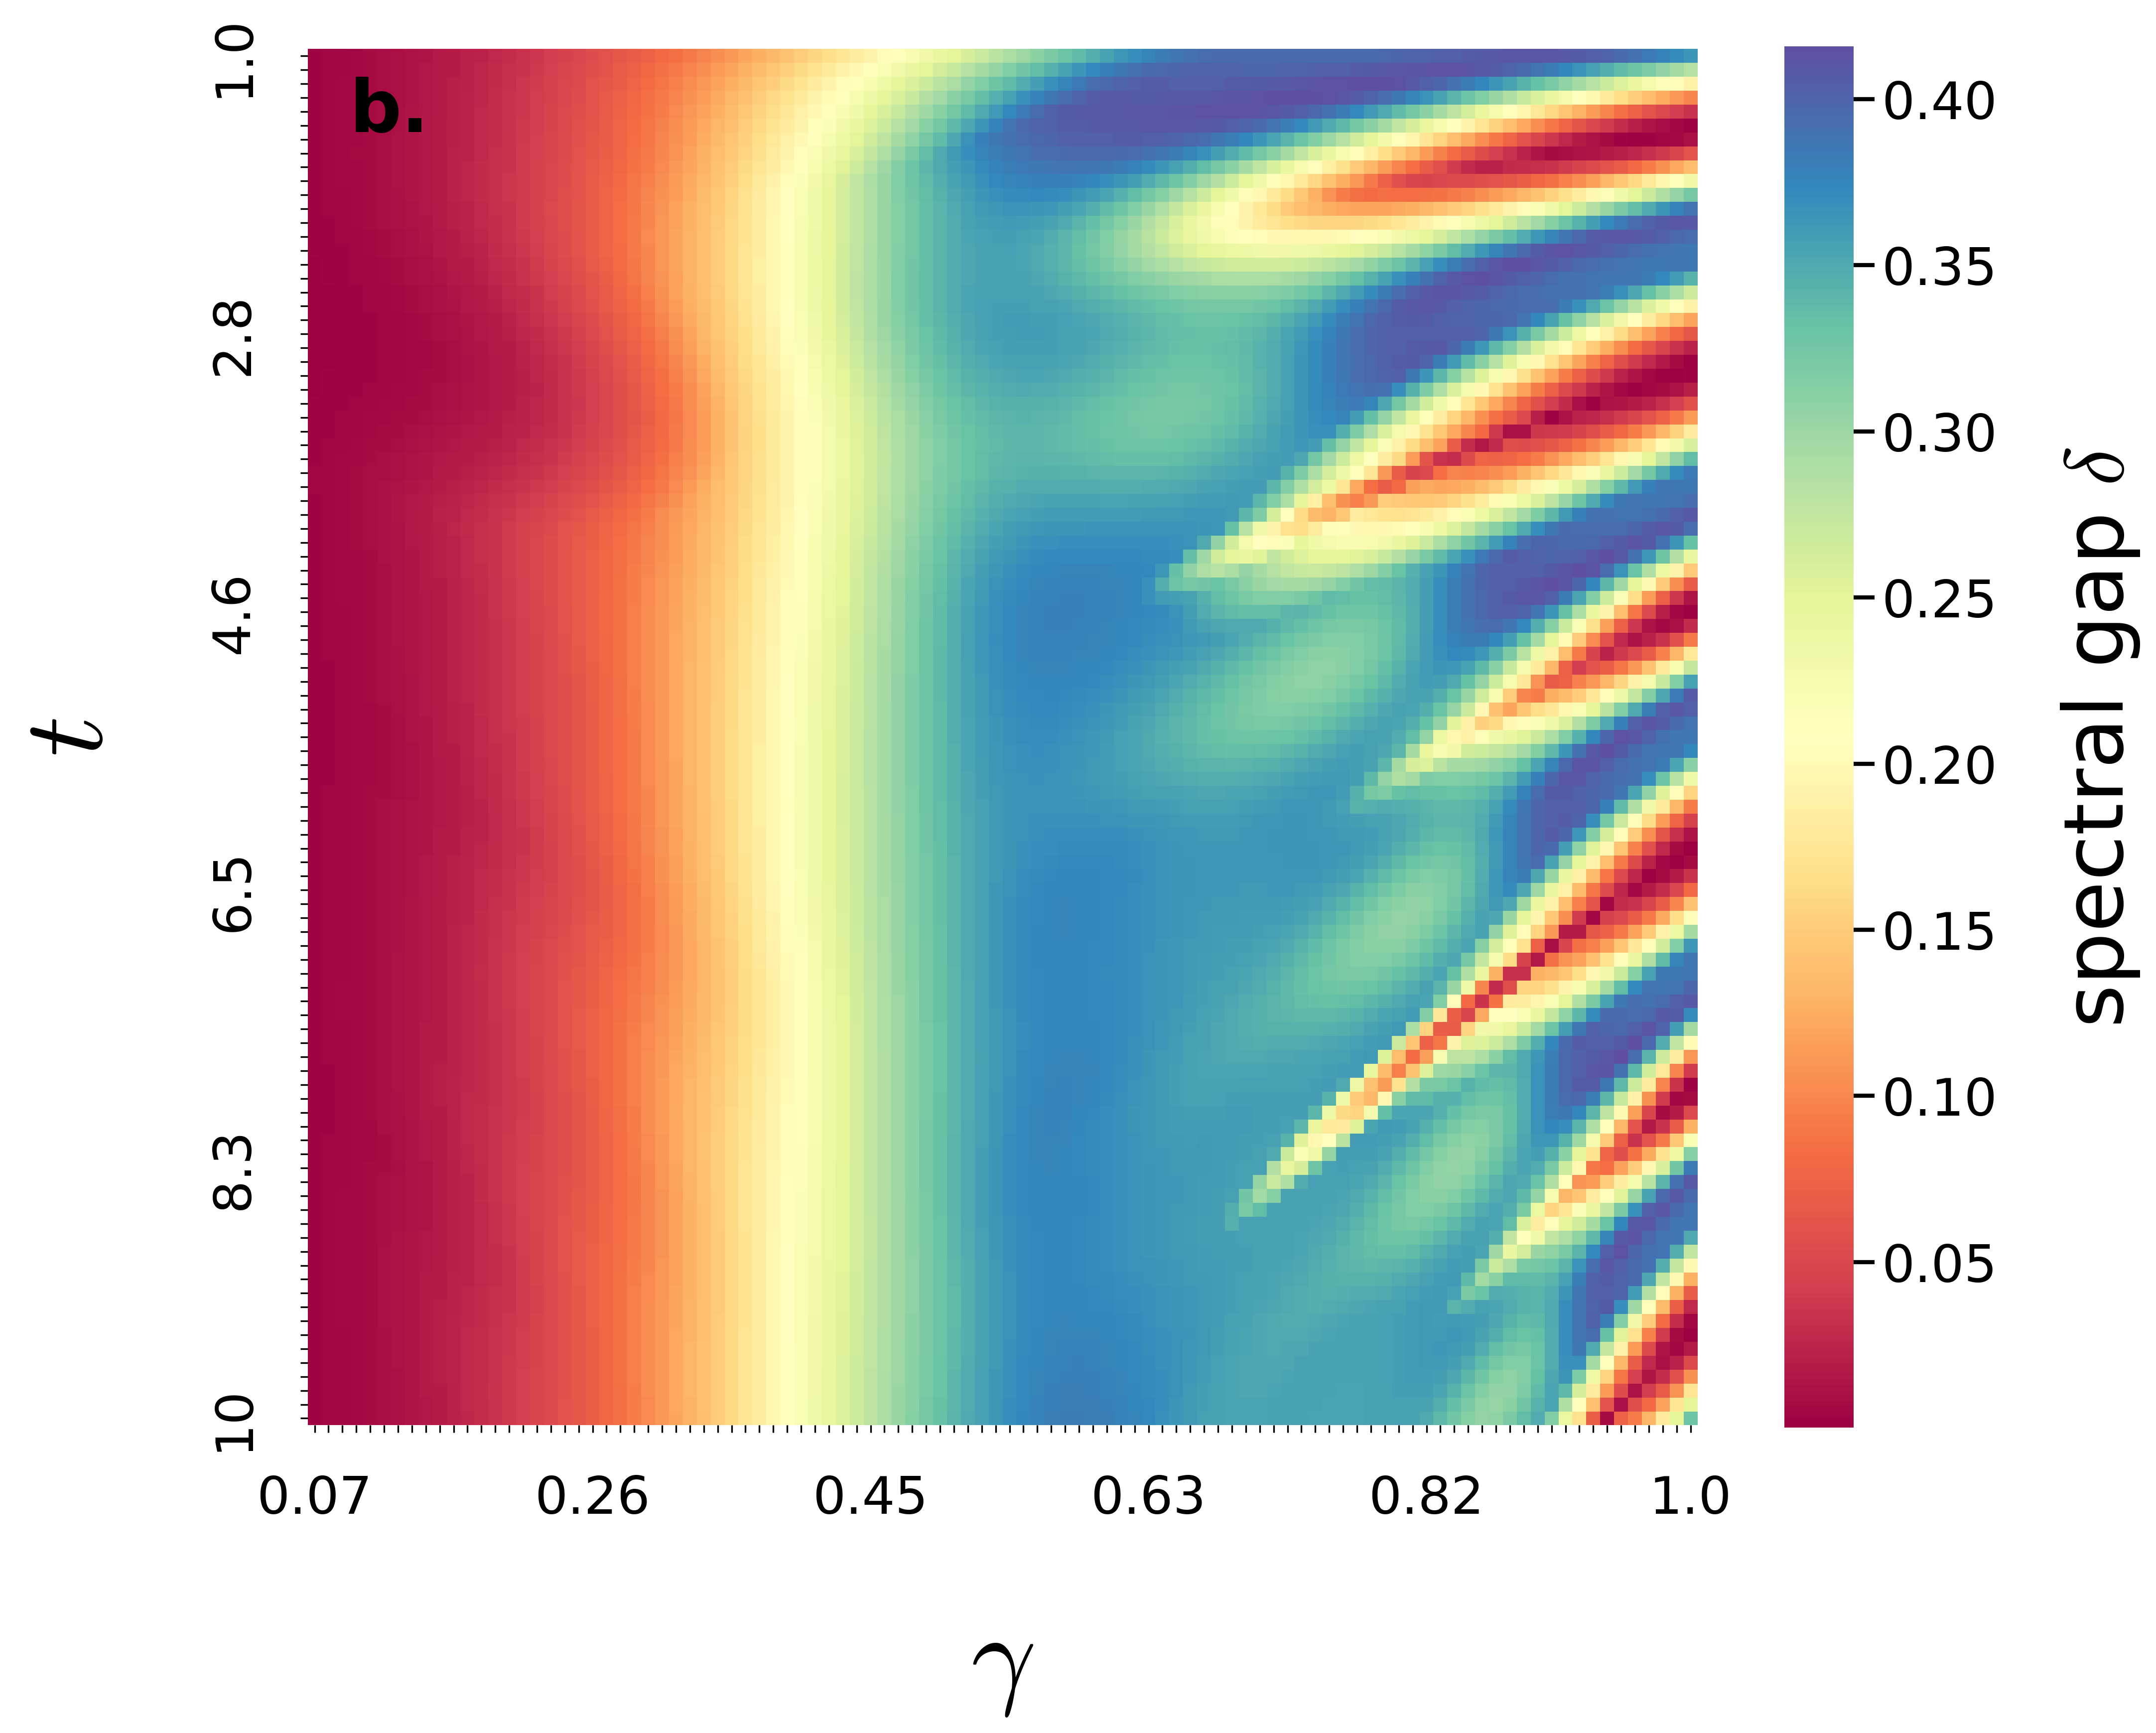

In [72]:
# plotting colormap spectral gap
plt.figure(figsize=(15,12), dpi=300)
s = sns.heatmap(spectral_gap, square=True, annot=False, cbar=True, cmap='Spectral', xticklabels=xticklabels, yticklabels=yticklabels)
s.set_xlabel('$\gamma$', fontsize=55, labelpad=40)
s.set_ylabel('$t$', fontsize=55, labelpad=40)
s.tick_params(labelsize=25, axis='both', which='major', pad=20) # width=2, length=10
s.figure.axes[1].tick_params(labelsize=25, width=2, length=10)
s.collections[0].colorbar.set_label('spectral gap $\delta$', fontsize=40, labelpad=30)  # fontname='Liberation Serif',
s.text(0.03, + 0.94, 'b.', fontsize = 35, transform=s.transAxes, fontweight='bold')  # , color='white'
# plt.yticks(rotation=0)
# plt.xticks(rotation=0)
# # plotting line
# pi = numpy.pi
# x = numpy.array(range(resolution))
# color_list = [ 'deepskyblue', 'darkblue', 'darkgreen', 'darkslategrey', 'indigo', 'black']
# for i in range(1,7):
#     sns.lineplot(x=x, y=(resolution/9)*(i*pi/(2*gammas)-1), linewidth=6, color=color_list[i-1], dashes= (2,2))
# #   
plt.savefig('./final_plots/sg_' + sim_name + '.png', bbox_inches='tight')

#### observables convergence plots

In [ ]:
#TODO: rifare solo con numpy senza passare da notebook

#
sim_name = 'observable'
label_str = ' lag integration' if 'integral' in sim_name else ' fixed lag' 
# creating DF out of csv files
en_name = './plot_data/' + sim_name + '/en.csv'
mag_name = './plot_data/' + sim_name + '/mag.csv'
en_df = pd.read_csv(en_name) # put the csv file in the right folder
mag_df = pd.read_csv(mag_name)

In [ ]:
en_mean = numpy.array(en_df['mean'])
en_std = numpy.array(en_df['std'])
mag_mean = numpy.array(mag_df['mean'])
mag_std = numpy.array(mag_df['std'])

## 

In [ ]:
# plotting the results TODO: CLASS FOR PLOTTING
en_mean = numpy.array(en_df['mean'])
en_std = numpy.array(en_df['std'])
mag_mean = numpy.array(mag_df['mean'])
mag_std = numpy.array(mag_df['std'])


plot_name = 'opt_' + sim_name

# plotting
subplots_n = 1
figure, axis = plt.subplots((subplots_n), figsize=(15, 11), dpi=150)
figure.tight_layout(h_pad=3, w_pad=4)  # distances between subplots
#
# spectral gap
axis.plot(range(sg_mean.size), sg_mean, color='cornflowerblue', label='Optimization with $ACF$' + label_str,
               linestyle='-', lw=5, zorder=2)  # marker='o', markersize=10
axis.fill_between(range(sg_mean.size), sg_mean-sg_std, sg_mean+sg_std, alpha=0.3,
                     edgecolor='cornflowerblue', facecolor='cornflowerblue', linewidth=1, zorder=2)  # sg_mean-sg_var, sg_mean+sg_var
# random approach spectral gap
axis.plot(range(rp_sg_mean.size), rp_sg_mean, color='y', label='Random params: $\gamma \in [0.25, 0.6]$, $t \in [2, 20]$',
               linestyle='-', lw=5, zorder=1)  # marker='o', markersize=10
axis.fill_between(range(rp_sg_mean.size), rp_sg_mean-rp_sg_std, rp_sg_mean+rp_sg_std, alpha=0.2,
                     edgecolor='y', facecolor='y', linewidth=1, zorder=1)  # rp_sg_mean-rp_sg_var, rp_sg_mean+rp_sg_var
#
# axis.text(0.03, + 0.87, 'a.', fontsize = 33, transform=axis.transAxes, fontweight='bold')
#axis[0].grid(linestyle='--')
axis.set_xticklabels([])
axis.set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis.tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis.legend(fontsize=30, loc='lower right', borderpad=0.3, labelspacing=0.2)  # loc='upper left', labelspacing=2, borderpad=2, prop={'size':50}
# axis[0].set_title('Spectral gap $\delta$')
# axis[0].set_ylim(0, 1)
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(3)
plt.show()

#### scaling

In [25]:
sca_mean = numpy.array([0.690472922, 0.636689521, 0.614383435, 0.49440542, 0.480948465, 0.434536789, 0.398954839])
sca_std = numpy.array([0.080049124, 0.073143425, 0.038685881, 0.051273298, 0.05688328, 0.090496867, 0.079139824])
sca_name = 'scaling_1D_rand'

In [41]:
sca_mean = numpy.array([0.655946761, 0.444809201, 0.363620806, 0.346092293])
sca_std = numpy.array([0.103830874, 0.105530963, 0.058244334, 0.033183783])
sca_name = 'scaling_2D_rand'

In [26]:
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, B):
    return x**(-B)

In [27]:
# Use curve_fit to fit the function to the data
popt, pcov = curve_fit(func, range(3,3 + sca_mean.size), sca_mean)

# Print the fitted parameters
print('B:', popt[0])

B: 0.3683499381365656


In [45]:
# linear fit
coeff = numpy.polyfit(range(3,3 + sca_mean.size), sca_mean, deg=1)
print(coeff)

[-0.0504391   0.84126192]


In [ ]:
# exp fit
sca_mean_log = numpy.log(sca_mean-coeff[1])
exp_coeff = numpy.polyfit(range(3,3 + sca_mean.size), sca_mean_log, 1, rcond=0.01)
print(exp_coeff)

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

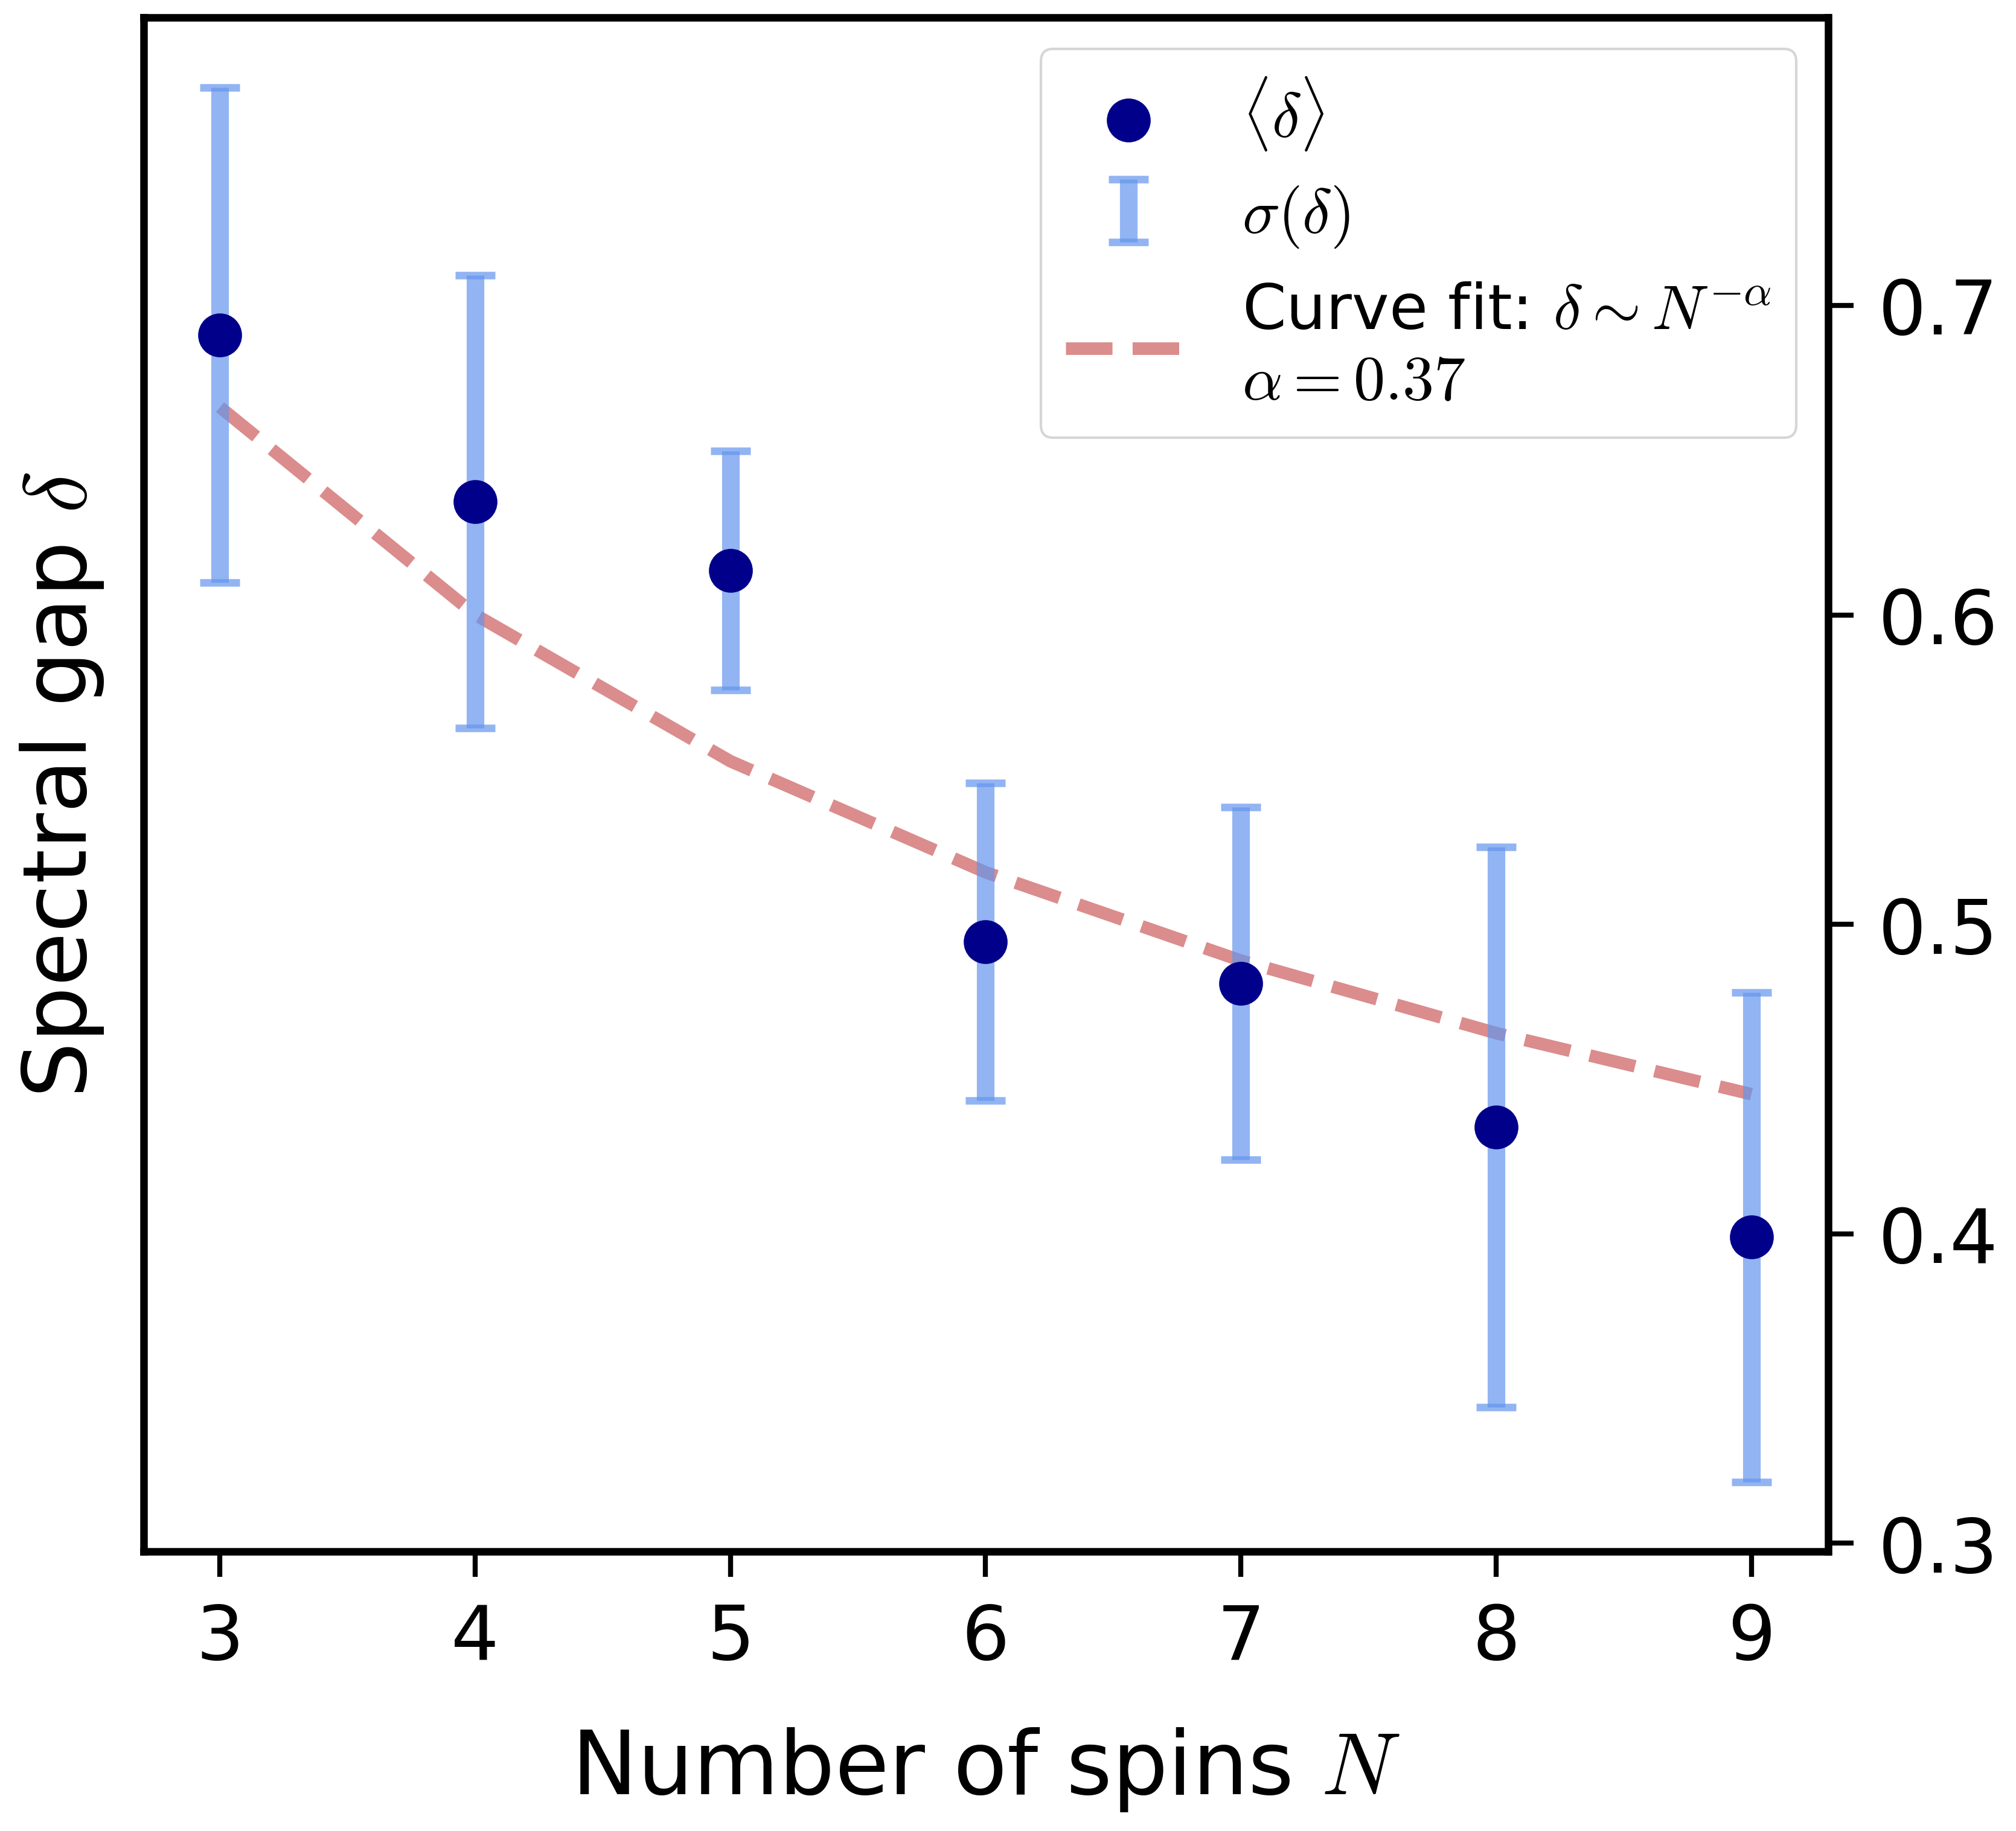

In [28]:
subplots_n = 1
figure, axis = plt.subplots((subplots_n), figsize=(12, 11), dpi=300)
# correlation
markers, caps, bars = axis.errorbar(range(3,3 + sca_mean.size), sca_mean, yerr=sca_std, label='$\sigma(\delta)$', color='darkblue',
               ecolor='cornflowerblue', elinewidth=7, capsize=8, capthick=3, barsabove=True, markersize=0,
               alpha=0.7, fmt='o', zorder=2) # (remove first point as it's usually an outlier)

axis.scatter(range(3,3 + sca_mean.size), sca_mean, s=270, marker='o', color='darkblue', label='$\\langle \\delta \\rangle$', zorder=3)

axis.plot(range(3,3 + sca_mean.size), numpy.array(range(3,3 + sca_mean.size))**-popt[0], color='indianred', lw=5, ls='--',
           label='Curve fit: $\delta \sim N^{-\\alpha}$' + f'\n$\\alpha={round(popt[0],2)}$', alpha=0.7, zorder=1)
#
# Define time range and parameters for the two exponentials
t = numpy.linspace(3, 2 + sca_mean.size, 1000)
A = 0.3
B = 1.5
C = 4
# Calculate the two exponentials and their difference
y1 = A + B * numpy.exp(-t / C)
#
#axis.plot(t, y1, color='olive', lw=5, ls='--', label='exp fit', alpha=0.7, zorder=1)
#axis.scatter(cf_mean, sg_mean, s=180, marker='o', color='darkred', zorder=3)
# [bar.set_alpha(0.2) for bar in bars]
# [cap.set_alpha(0.2) for cap in caps]
#axis.grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
# axis.yaxis.set_label_position("right")

#
handles,labels = axis.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]
#

axis.yaxis.tick_right()
axis.set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis.set_xlabel('Number of spins $N$', fontsize=35, labelpad=20)
axis.tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
# axis.text(0.9, + 0.93, 'c.', fontsize = 33, transform=axis.transAxes, fontweight='bold')
# axis.set_yscale('log')
axis.legend(handles,labels,fontsize=25)
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(3)
#
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

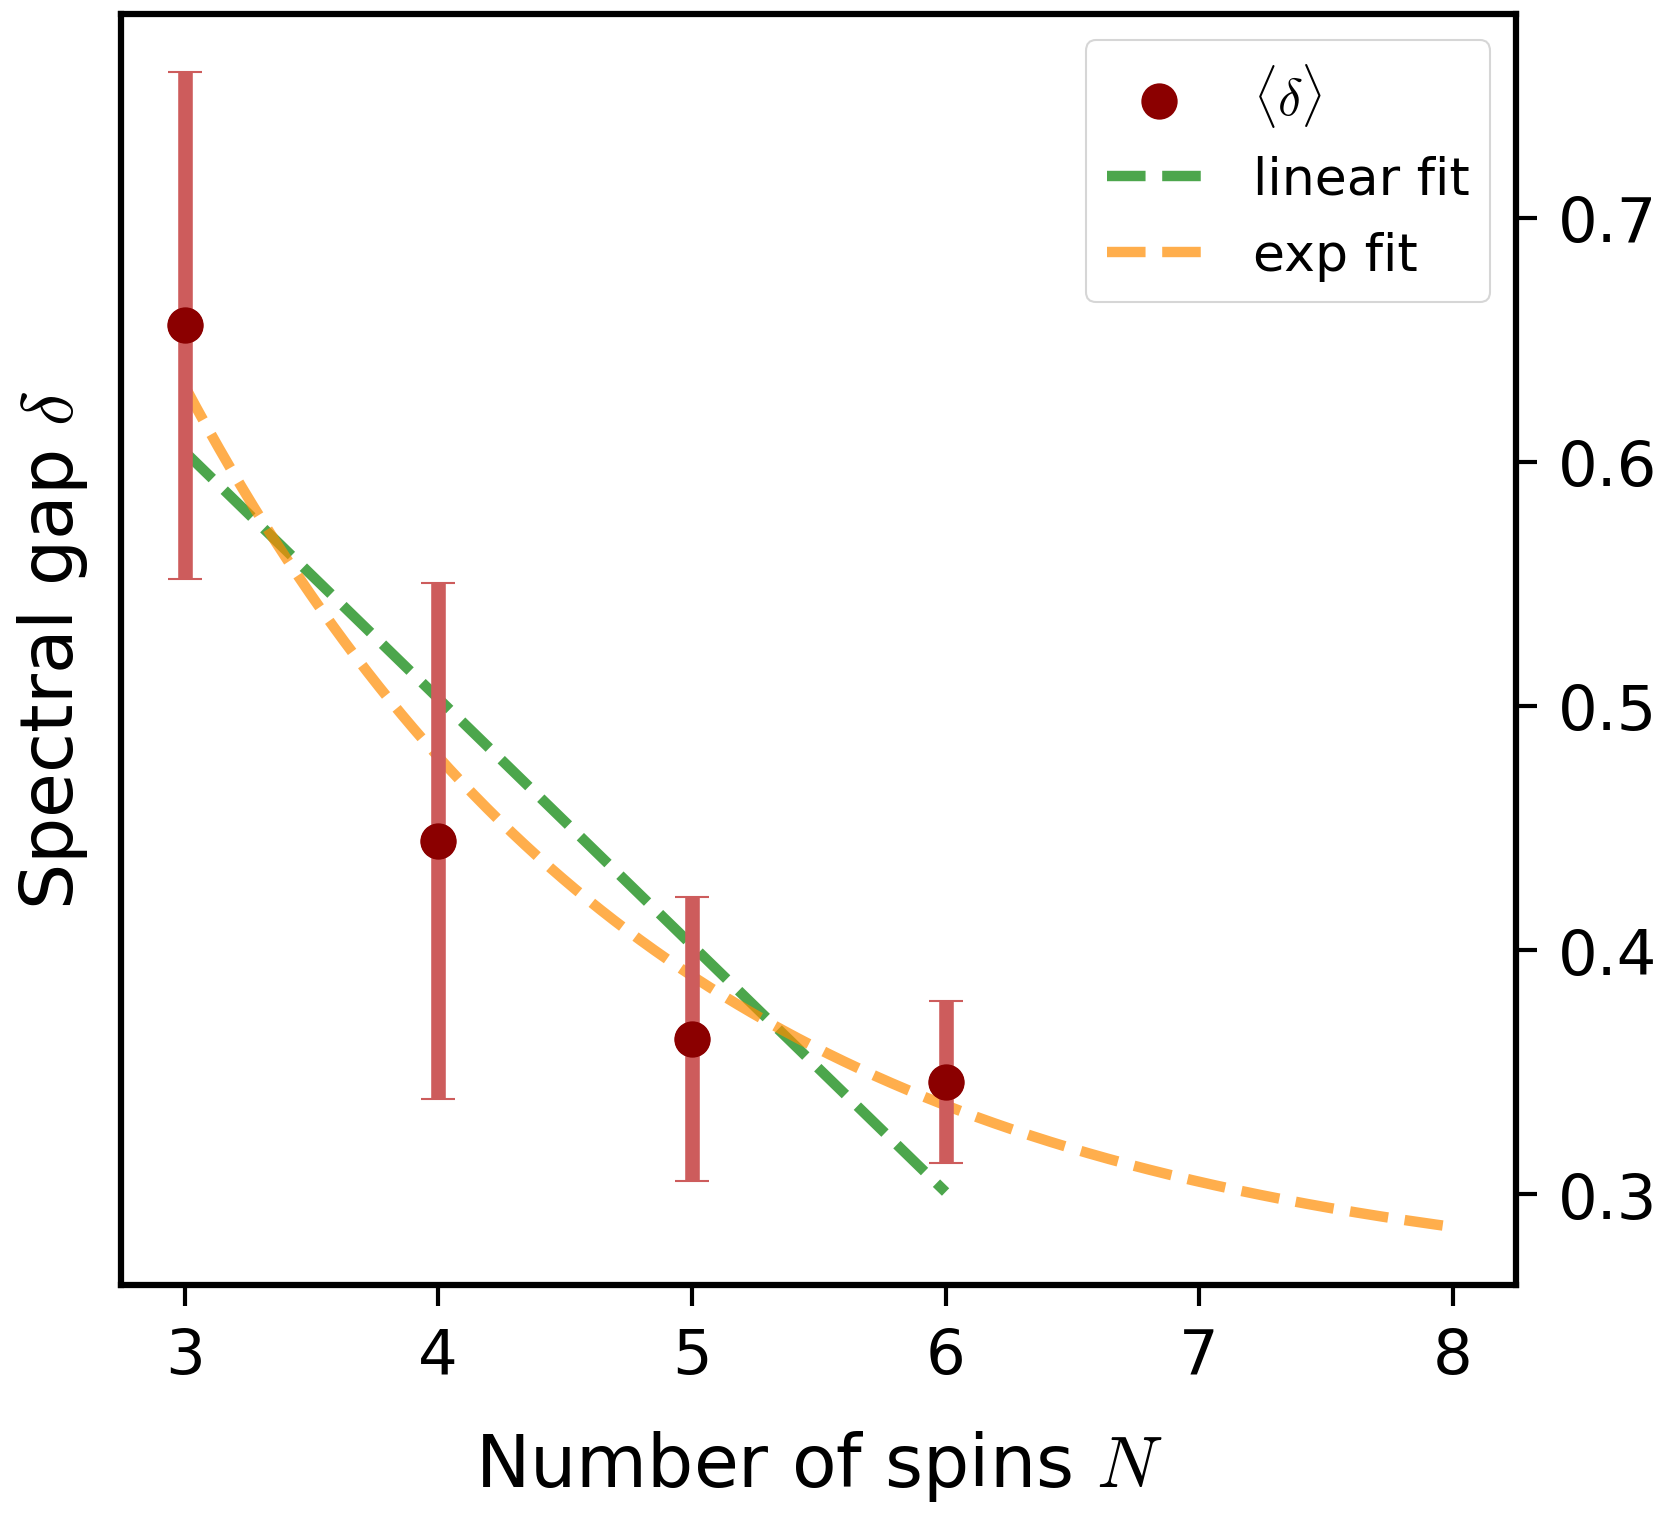

In [43]:
ubplots_n = 1
figure, axis = plt.subplots((subplots_n), figsize=(12, 11), dpi=150)
# correlation
markers, caps, bars = axis.errorbar(range(3,3 + sca_mean.size), sca_mean, yerr=sca_std, color='darkred',
               ecolor='indianred', elinewidth=7, capsize=8, barsabove=True, markersize=16,
               alpha=1, fmt='o', zorder=2) # (remove first point as it's usually an outlier)
axis.scatter(range(3,3 + sca_mean.size), sca_mean, s=270, marker='o', color='darkred', label='$\\langle \\delta \\rangle$', zorder=3)
axis.plot(range(3,3 + sca_mean.size), coeff[1] + coeff[0]*numpy.array(range(3,3 + sca_mean.size)), color='green', lw=5, ls='--', label='linear fit', alpha=0.7, zorder=1)
#
# Define time range and parameters for the two exponentials
t = numpy.linspace(3, 8, 1000)
A = 0.26
B = 1.8
C = 1.9
# Calculate the two exponentials and their difference
y1 = A + B * numpy.exp(-t / C)
#
axis.plot(t, y1, color='darkorange', lw=5, ls='--', label='exp fit', alpha=0.7, zorder=1)
#axis.scatter(cf_mean, sg_mean, s=180, marker='o', color='darkred', zorder=3)
# [bar.set_alpha(0.2) for bar in bars]
# [cap.set_alpha(0.2) for cap in caps]
#axis.grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
# axis.yaxis.set_label_position("right")
axis.yaxis.tick_right()
axis.set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis.set_xlabel('Number of spins $N$', fontsize=35, labelpad=20)
axis.tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
# axis.text(0.9, + 0.93, 'c.', fontsize = 33, transform=axis.transAxes, fontweight='bold')
# axis.set_yscale('log')
axis.legend(fontsize=25)
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(3)
#
plt.show()

In [29]:
# saving the plot as png file
png_name = './final_plots/' + sca_name + '.png'
figure.savefig(png_name, bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following